In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv('C:/Users/150ho/Desktop/data analyst/4. Машинное обучение/lesson2/1/GAZP_210801_220806.txt')

In [77]:
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,GAZP,D,20210802,0,287.88,289.48,285.21,286.75,38297270
1,GAZP,D,20210803,0,286.77,288.05,284.34,287.09,27065240
2,GAZP,D,20210804,0,287.89,288.80,286.00,287.94,23599750
3,GAZP,D,20210805,0,287.31,288.28,285.16,285.95,47254880
4,GAZP,D,20210806,0,285.26,285.72,277.87,282.27,90600850
...,...,...,...,...,...,...,...,...,...
233,GAZP,D,20220801,0,194.50,194.69,192.00,192.00,13034930
234,GAZP,D,20220802,0,191.56,191.68,186.80,187.16,24267570
235,GAZP,D,20220803,0,187.59,188.97,186.31,187.04,12005960
236,GAZP,D,20220804,0,187.04,187.22,184.30,184.90,13313950


In [78]:
df.columns = ['TICKER','PER', 'ds', 'TIME', 'OPEN', 'HIGH', 'LOW', 'y', 'VOL']

In [79]:
df

,TICKER,PER,ds,TIME,OPEN,HIGH,LOW,y,VOL
0,GAZP,D,20210802,0,287.88,289.48,285.21,286.75,38297270
1,GAZP,D,20210803,0,286.77,288.05,284.34,287.09,27065240
2,GAZP,D,20210804,0,287.89,288.80,286.00,287.94,23599750
3,GAZP,D,20210805,0,287.31,288.28,285.16,285.95,47254880
4,GAZP,D,20210806,0,285.26,285.72,277.87,282.27,90600850
...,...,...,...,...,...,...,...,...,...
233,GAZP,D,20220801,0,194.50,194.69,192.00,192.00,13034930
234,GAZP,D,20220802,0,191.56,191.68,186.80,187.16,24267570
235,GAZP,D,20220803,0,187.59,188.97,186.31,187.04,12005960
236,GAZP,D,20220804,0,187.04,187.22,184.30,184.90,13313950


In [80]:
df['ds']

0      20210802
1      20210803
2      20210804
3      20210805
4      20210806
         ...   
233    20220801
234    20220802
235    20220803
236    20220804
237    20220805
Name: ds, Length: 238, dtype: int64

In [81]:
df['ds'] = pd.to_datetime(df['ds'], format='%Y%m%d',dayfirst=True)

In [82]:
df['ds']

0     2021-08-02
1     2021-08-03
2     2021-08-04
3     2021-08-05
4     2021-08-06
         ...    
233   2022-08-01
234   2022-08-02
235   2022-08-03
236   2022-08-04
237   2022-08-05
Name: ds, Length: 238, dtype: datetime64[ns]

In [83]:
df1 = df[['ds','y']]

In [84]:
df1.set_index('ds', inplace=True)

In [85]:
df1

,y
ds,
2021-08-02,286.75
2021-08-03,287.09
2021-08-04,287.94
2021-08-05,285.95
2021-08-06,282.27
...,...
2022-08-01,192.00
2022-08-02,187.16
2022-08-03,187.04


<AxesSubplot:xlabel='ds'>

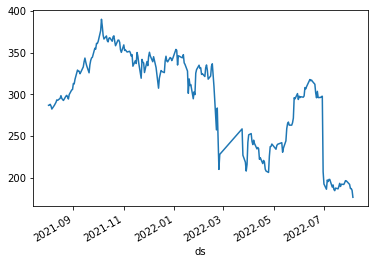

In [86]:
df1.y.plot()

<AxesSubplot:xlabel='ds'>

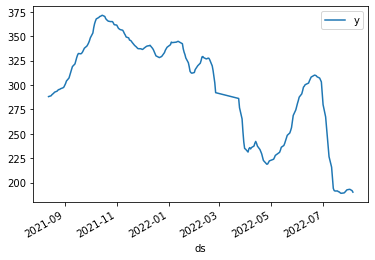

In [87]:
df1.rolling(10).mean().plot()

In [88]:
# функция по созданию сгенерированных признаков
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['is_weekend'] = data.index.isin([5,6])*1
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['y'].shift(lag)

    data['y_mean'] = data['y'].shift().rolling(rolling_mean_size).mean().copy()

In [89]:
make_features(df1, 7, 3)

In [90]:
df1

,y,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,,
2021-08-02,286.75,2021,8,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-03,287.09,2021,8,3,1,0,286.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-04,287.94,2021,8,4,2,0,287.09,286.75,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-05,285.95,2021,8,5,3,0,287.94,287.09,286.75,NaN,NaN,NaN,NaN,287.260000
2021-08-06,282.27,2021,8,6,4,0,285.95,287.94,287.09,286.75,NaN,NaN,NaN,286.993333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,192.00,2022,8,1,0,0,195.26,196.25,196.49,193.95,192.00,192.25,189.59,196.000000
2022-08-02,187.16,2022,8,2,1,0,192.00,195.26,196.25,196.49,193.95,192.00,192.25,194.503333
2022-08-03,187.04,2022,8,3,2,0,187.16,192.00,195.26,196.25,196.49,193.95,192.00,191.473333


In [91]:
df1.dropna(inplace=True)

In [92]:
df1

,y,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,,
2021-08-11,290.35,2021,8,11,2,0,288.61,286.68,282.27,285.95,287.94,287.09,286.75,285.853333
2021-08-12,293.23,2021,8,12,3,0,290.35,288.61,286.68,282.27,285.95,287.94,287.09,288.546667
2021-08-13,292.70,2021,8,13,4,0,293.23,290.35,288.61,286.68,282.27,285.95,287.94,290.730000
2021-08-16,295.10,2021,8,16,0,0,292.70,293.23,290.35,288.61,286.68,282.27,285.95,292.093333
2021-08-17,298.32,2021,8,17,1,0,295.10,292.70,293.23,290.35,288.61,286.68,282.27,293.676667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,192.00,2022,8,1,0,0,195.26,196.25,196.49,193.95,192.00,192.25,189.59,196.000000
2022-08-02,187.16,2022,8,2,1,0,192.00,195.26,196.25,196.49,193.95,192.00,192.25,194.503333
2022-08-03,187.04,2022,8,3,2,0,187.16,192.00,195.26,196.25,196.49,193.95,192.00,191.473333


In [93]:
features = df1.drop(['y'],axis = 1)
target = df1['y']
X_train,X_test,y_train, y_test = train_test_split(features,target, shuffle=False, test_size=0.25)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (173, 13)
X_test (58, 13)


In [94]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [95]:
y_predicted_lr = model_lr.predict(X_test)

In [96]:
y_predicted_lr

array([244.19233229, 256.00841739, 260.40801267, 261.58802053,
       264.30333786, 264.21460192, 265.78988248, 268.47649509,
       285.79192891, 292.51514519, 295.33351871, 291.77019677,
       295.53755248, 294.11262519, 295.28800469, 293.51156338,
       293.42192607, 301.11798185, 301.01452587, 304.31757364,
       310.43043646, 311.94662542, 310.53487564, 311.59230649,
       309.36217203, 299.62168747, 291.45954988, 295.81551813,
       294.82613741, 290.6415951 , 290.28832989, 292.61875427,
       224.32369413, 194.88581349, 192.89859313, 202.12280224,
       188.84334797, 185.24340702, 198.64771686, 194.36794898,
       193.96326899, 189.25278051, 186.49415501, 189.94493974,
       189.6172382 , 190.87129437, 192.90406539, 191.15009811,
       195.02257861, 194.82267912, 196.09455412, 196.71398655,
       196.08122761, 199.16084041, 195.62297355, 190.99031375,
       188.99573107, 186.4760259 ])

In [97]:
print("RMSE тестовой выборки LinearRegression: ",np.sqrt(mean_squared_error(y_test, y_predicted_lr)))

RMSE тестовой выборки LinearRegression:  14.039845196108528


In [98]:
df1_with_predict = X_test
df1_with_predict['real_value'] = y_test
df1_with_predict['y_predicted_lr'] = y_predicted_lr
df1_with_predict[['real_value','y_predicted_lr']].tail(10)

,real_value,y_predicted_lr
ds,,
2022-07-25,192.00,195.022579
2022-07-26,193.95,194.822679
2022-07-27,196.49,196.094554
2022-07-28,196.25,196.713987
2022-07-29,195.26,196.081228
2022-08-01,192.00,199.160840
2022-08-02,187.16,195.622974
2022-08-03,187.04,190.990314
2022-08-04,184.90,188.995731


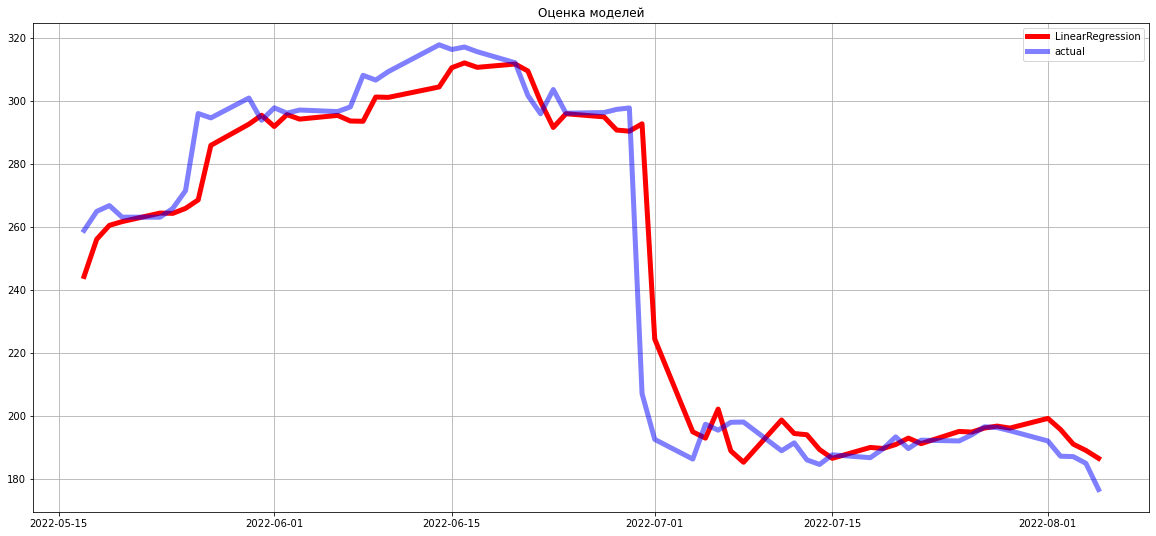

In [99]:
plt.figure(figsize=(20, 9))
plt.plot(df1_with_predict['y_predicted_lr'], "r",linewidth=5, label="LinearRegression")
plt.plot(df1_with_predict['real_value'],'b' ,label="actual", linewidth=5, alpha = 0.5)
plt.legend(loc="best")
plt.title("Оценка моделей")
plt.grid(True);

## Используем Facebok

In [100]:
# conda install -c conda-forge prophet

In [101]:
# https://facebook.github.io/prophet/
from prophet import Prophet

In [102]:
m = Prophet()

In [103]:
df_prophet = df1[['y']]

In [104]:
df_prophet

,y
ds,
2021-08-11,290.35
2021-08-12,293.23
2021-08-13,292.70
2021-08-16,295.10
2021-08-17,298.32
...,...
2022-08-01,192.00
2022-08-02,187.16
2022-08-03,187.04


In [105]:
df_prophet.reset_index(inplace=True)

In [106]:
df_prophet

,ds,y
0,2021-08-11,290.35
1,2021-08-12,293.23
2,2021-08-13,292.70
3,2021-08-16,295.10
4,2021-08-17,298.32
...,...,...
226,2022-08-01,192.00
227,2022-08-02,187.16
228,2022-08-03,187.04
229,2022-08-04,184.90


In [107]:
m.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [108]:
future = m.make_future_dataframe(periods=7)
future.tail(7)

,ds
231,2022-08-06
232,2022-08-07
233,2022-08-08
234,2022-08-09
235,2022-08-10
236,2022-08-11
237,2022-08-12


In [109]:
forecast = m.predict(future)

In [110]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-11,319.107419,285.980602,369.367982,319.107419,319.107419,9.101976,9.101976,9.101976,9.101976,9.101976,9.101976,0.0,0.0,0.0,328.209394
1,2021-08-12,319.394513,283.313750,365.921079,319.394513,319.394513,4.840479,4.840479,4.840479,4.840479,4.840479,4.840479,0.0,0.0,0.0,324.234992
2,2021-08-13,319.681607,280.743486,364.218814,319.681607,319.681607,2.325655,2.325655,2.325655,2.325655,2.325655,2.325655,0.0,0.0,0.0,322.007262
3,2021-08-16,320.542890,282.290374,365.689835,320.542890,320.542890,4.245365,4.245365,4.245365,4.245365,4.245365,4.245365,0.0,0.0,0.0,324.788254
4,2021-08-17,320.829984,289.580149,370.129383,320.829984,320.829984,8.898821,8.898821,8.898821,8.898821,8.898821,8.898821,0.0,0.0,0.0,329.728805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,2022-08-08,203.045990,165.805266,246.551170,203.045990,203.045990,4.245365,4.245365,4.245365,4.245365,4.245365,4.245365,0.0,0.0,0.0,207.291355
234,2022-08-09,202.514291,171.163094,250.178621,202.510899,202.520611,8.898821,8.898821,8.898821,8.898821,8.898821,8.898821,0.0,0.0,0.0,211.413112
235,2022-08-10,201.982592,168.396452,252.404010,201.967452,202.006800,9.101976,9.101976,9.101976,9.101976,9.101976,9.101976,0.0,0.0,0.0,211.084567
236,2022-08-11,201.450892,165.146628,247.692870,201.421578,201.495290,4.840479,4.840479,4.840479,4.840479,4.840479,4.840479,0.0,0.0,0.0,206.291371


In [111]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
231,2022-08-06,189.403241,148.173635,230.226543
232,2022-08-07,188.871541,145.763936,232.543383
233,2022-08-08,207.291355,165.805266,246.551170
234,2022-08-09,211.413112,171.163094,250.178621
235,2022-08-10,211.084567,168.396452,252.404010
236,2022-08-11,206.291371,165.146628,247.692870
237,2022-08-12,203.244848,163.420997,243.174065


In [112]:
forecast.set_index('ds', inplace=True)

<AxesSubplot:xlabel='ds'>

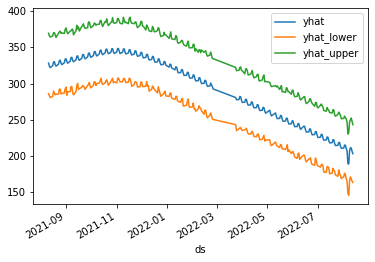

In [113]:
forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']].plot()

# Сравниваем результаты

In [119]:
df1_with_predict = X_test
df1_with_predict['y'] = y_test
df1_with_predict['y_predicted_lr'] = y_predicted_lr
df1_with_predict['y_prophet'] = forecast.yhat
df1_with_predict[['real_value','y_predicted_lr', 'y_prophet']].tail(10)

,real_value,y_predicted_lr,y_prophet
ds,,,
2022-07-25,192.00,195.022579,214.735143
2022-07-26,193.95,194.822679,218.856900
2022-07-27,196.49,196.094554,218.528355
2022-07-28,196.25,196.713987,213.735159
2022-07-29,195.26,196.081228,210.688636
2022-08-01,192.00,199.160840,211.013249
2022-08-02,187.16,195.622974,215.135006
2022-08-03,187.04,190.990314,214.806461
2022-08-04,184.90,188.995731,210.013265


<AxesSubplot:xlabel='ds'>

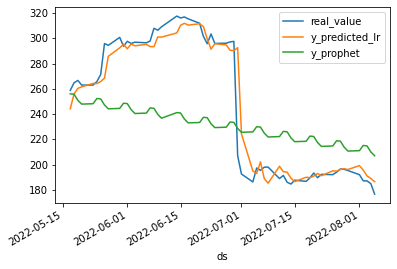

In [120]:
df1_with_predict[[ 'real_value', 'y_predicted_lr', 'y_prophet']].plot()

In [123]:
print("RMSE on LinearRegression: ",np.sqrt(mean_squared_error(y_test, y_predicted_lr)))
print("RMSE on Prophet: ",np.sqrt(mean_squared_error(y_test, df1_with_predict.y_prophet)))

RMSE on LinearRegression:  14.039845196108528
RMSE on Prophet:  46.03343204654524
